In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels as stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('whitegrid')

In [146]:
df = pd.read_excel('data/car_insurance_claim.xlsx')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
ID            10302 non-null int64
KIDSDRIV      10302 non-null int64
BIRTH         10302 non-null datetime64[ns]
AGE           10295 non-null float64
HOMEKIDS      10302 non-null int64
YOJ           9754 non-null float64
INCOME        9732 non-null float64
PARENT1       10302 non-null object
HOME_VAL      9727 non-null float64
MSTATUS       10302 non-null object
GENDER        10302 non-null object
EDUCATION     10302 non-null object
OCCUPATION    9637 non-null object
TRAVTIME      10302 non-null int64
CAR_USE       10302 non-null object
BLUEBOOK      10302 non-null int64
TIF           10302 non-null int64
CAR_TYPE      10302 non-null object
RED_CAR       10302 non-null object
OLDCLAIM      10302 non-null int64
CLM_FREQ      10302 non-null int64
REVOKED       10302 non-null object
MVR_PTS       10302 non-null int64
CLM_AMT       10302 non-null int64
CAR_AGE       9663 non-null f

In [148]:
df.head(5)

ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0 1939-03-16 60.00         0 11.00 67349.00      No   
1  132761049         0 1956-01-21 43.00         0 11.00 91449.00      No   
2  921317019         0 1951-11-18 48.00         0 11.00 52881.00      No   
3  727598473         0 1964-03-05 35.00         1 10.00 16039.00      No   
4  450221861         0 1948-06-05 51.00         0 14.00      nan      No   

   HOME_VAL MSTATUS         ...          CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0      0.00      No         ...           Minivan     yes     4461         2   
1 257252.00      No         ...           Minivan     yes        0         0   
2      0.00      No         ...               Van     yes        0         0   
3 124191.00     Yes         ...             z_SUV      no    38690         2   
4 306251.00     Yes         ...           Minivan     yes        0         0   

  REVOKED  MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0      No        3        0   18.00          0  Highly Urban/ Urban  
1      No        0        0    1.00          0  Highly Urban/ Urban  
2      No        2        0   10.00          0  Highly Urban/ Urban  
3      No        3        0   10.00          0  Highly Urban/ Urban  
4      No        0        0    6.00          0  Highly Urban/ Urban  

[5 rows x 27 columns]

In [149]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

ID  KIDSDRIV      AGE  HOMEKIDS     YOJ    INCOME  HOME_VAL  \
count     10302.00  10302.00 10295.00  10302.00 9754.00   9732.00   9727.00   
mean  495663109.08      0.17    44.84      0.72   10.47  61572.07 154523.02   
std   286467479.03      0.51     8.61      1.12    4.11  47457.20 129188.44   
min       63175.00      0.00    16.00      0.00    0.00      0.00      0.00   
25%   244286856.00      0.00    39.00      0.00    9.00  27584.00      0.00   
50%   497004293.00      0.00    45.00      0.00   11.00  53529.00 160661.00   
75%   739455069.00      0.00    51.00      1.00   13.00  86166.00 238256.00   
max   999926368.00      4.00    81.00      5.00   23.00 367030.00 885282.00   

       TRAVTIME  BLUEBOOK      TIF  OLDCLAIM  CLM_FREQ  MVR_PTS   CLM_AMT  \
count  10302.00  10302.00 10302.00  10302.00  10302.00 10302.00  10302.00   
mean      33.42  15659.92     5.33   4033.98      0.80     1.71   1511.27   
std       15.87   8428.77     4.11   8733.14      1.15     2.16   4725.25   
min        5.00   1500.00     1.00      0.00      0.00     0.00      0.00   
25%       22.00   9200.00     1.00      0.00      0.00     0.00      0.00   
50%       33.00  14400.00     4.00      0.00      0.00     1.00      0.00   
75%       44.00  20890.00     7.00   4647.50      2.00     3.00   1144.75   
max      142.00  69740.00    25.00  57037.00      5.00    13.00 123247.00   

       CAR_AGE  CLAIM_FLAG  
count  9663.00    10302.00  
mean      8.30        0.27  
std       5.71        0.44  
min      -3.00        0.00  
25%       1.00        0.00  
50%       8.00        0.00  
75%      12.00        1.00  
max      28.00        1.00

In [150]:
df.describe(include=['O'])

PARENT1 MSTATUS GENDER      EDUCATION     OCCUPATION  CAR_USE CAR_TYPE  \
count    10302   10302  10302          10302           9637    10302    10302   
unique       2       2      2              5              8        2        6   
top         No     Yes      F  z_High School  z_Blue Collar  Private    z_SUV   
freq      8959    6188   5545           2952           2288     6513     2883   

       RED_CAR REVOKED           URBANICITY  
count    10302   10302                10302  
unique       2       2                    2  
top         no      No  Highly Urban/ Urban  
freq      7326    9041                 8230

In [151]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [152]:
df['CAR_AGE'].fillna(df['CAR_AGE'].mean(),inplace = True)
df['INCOME'].fillna(0,inplace = True)
df['HOME_VAL'].fillna(0,inplace = True)
df['YOJ'].fillna(df['YOJ'].mean(),inplace = True)
df['AGE'].fillna(df['AGE'].mean(),inplace = True)
df['OCCUPATION'].fillna('z_Blue Collar',inplace= True)

In [153]:
df.isnull().sum().any()

False

In [154]:
def convertToBin(x):
    if x in ['Yes','yes','M','Highly Urban/ Urban','Private']:
        return 0
    else:
        return 1

In [155]:
df['MSTATUS'] = df['MSTATUS'].apply(lambda x: convertToBin(x))
df['GENDER'] = df['GENDER'].apply(lambda x: convertToBin(x))
df['RED_CAR'] = df['RED_CAR'].apply(lambda x: convertToBin(x))
df['URBANICITY'] = df['URBANICITY'].apply(lambda x: convertToBin(x))
df['PARENT1'] = df['PARENT1'].apply(lambda x: convertToBin(x))
df['REVOKED'] = df['REVOKED'].apply(lambda x: convertToBin(x))
df['CAR_USE'] = df ['CAR_USE'].apply(lambda x: convertToBin(x))


In [156]:
df.head(5)

ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  \
0   63581743         0 1939-03-16 60.00         0 11.00 67349.00        1   
1  132761049         0 1956-01-21 43.00         0 11.00 91449.00        1   
2  921317019         0 1951-11-18 48.00         0 11.00 52881.00        1   
3  727598473         0 1964-03-05 35.00         1 10.00 16039.00        1   
4  450221861         0 1948-06-05 51.00         0 14.00     0.00        1   

   HOME_VAL  MSTATUS     ...      CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0      0.00        1     ...       Minivan       0     4461         2   
1 257252.00        1     ...       Minivan       0        0         0   
2      0.00        1     ...           Van       0        0         0   
3 124191.00        0     ...         z_SUV       1    38690         2   
4 306251.00        0     ...       Minivan       0        0         0   

   REVOKED  MVR_PTS  CLM_AMT CAR_AGE  CLAIM_FLAG  URBANICITY  
0        1        3        0   18.00           0           0  
1        1        0        0    1.00           0           0  
2        1        2        0   10.00           0           0  
3        1        3        0   10.00           0           0  
4        1        0        0    6.00           0           0  

[5 rows x 27 columns]

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 720x432 with 0 Axes>

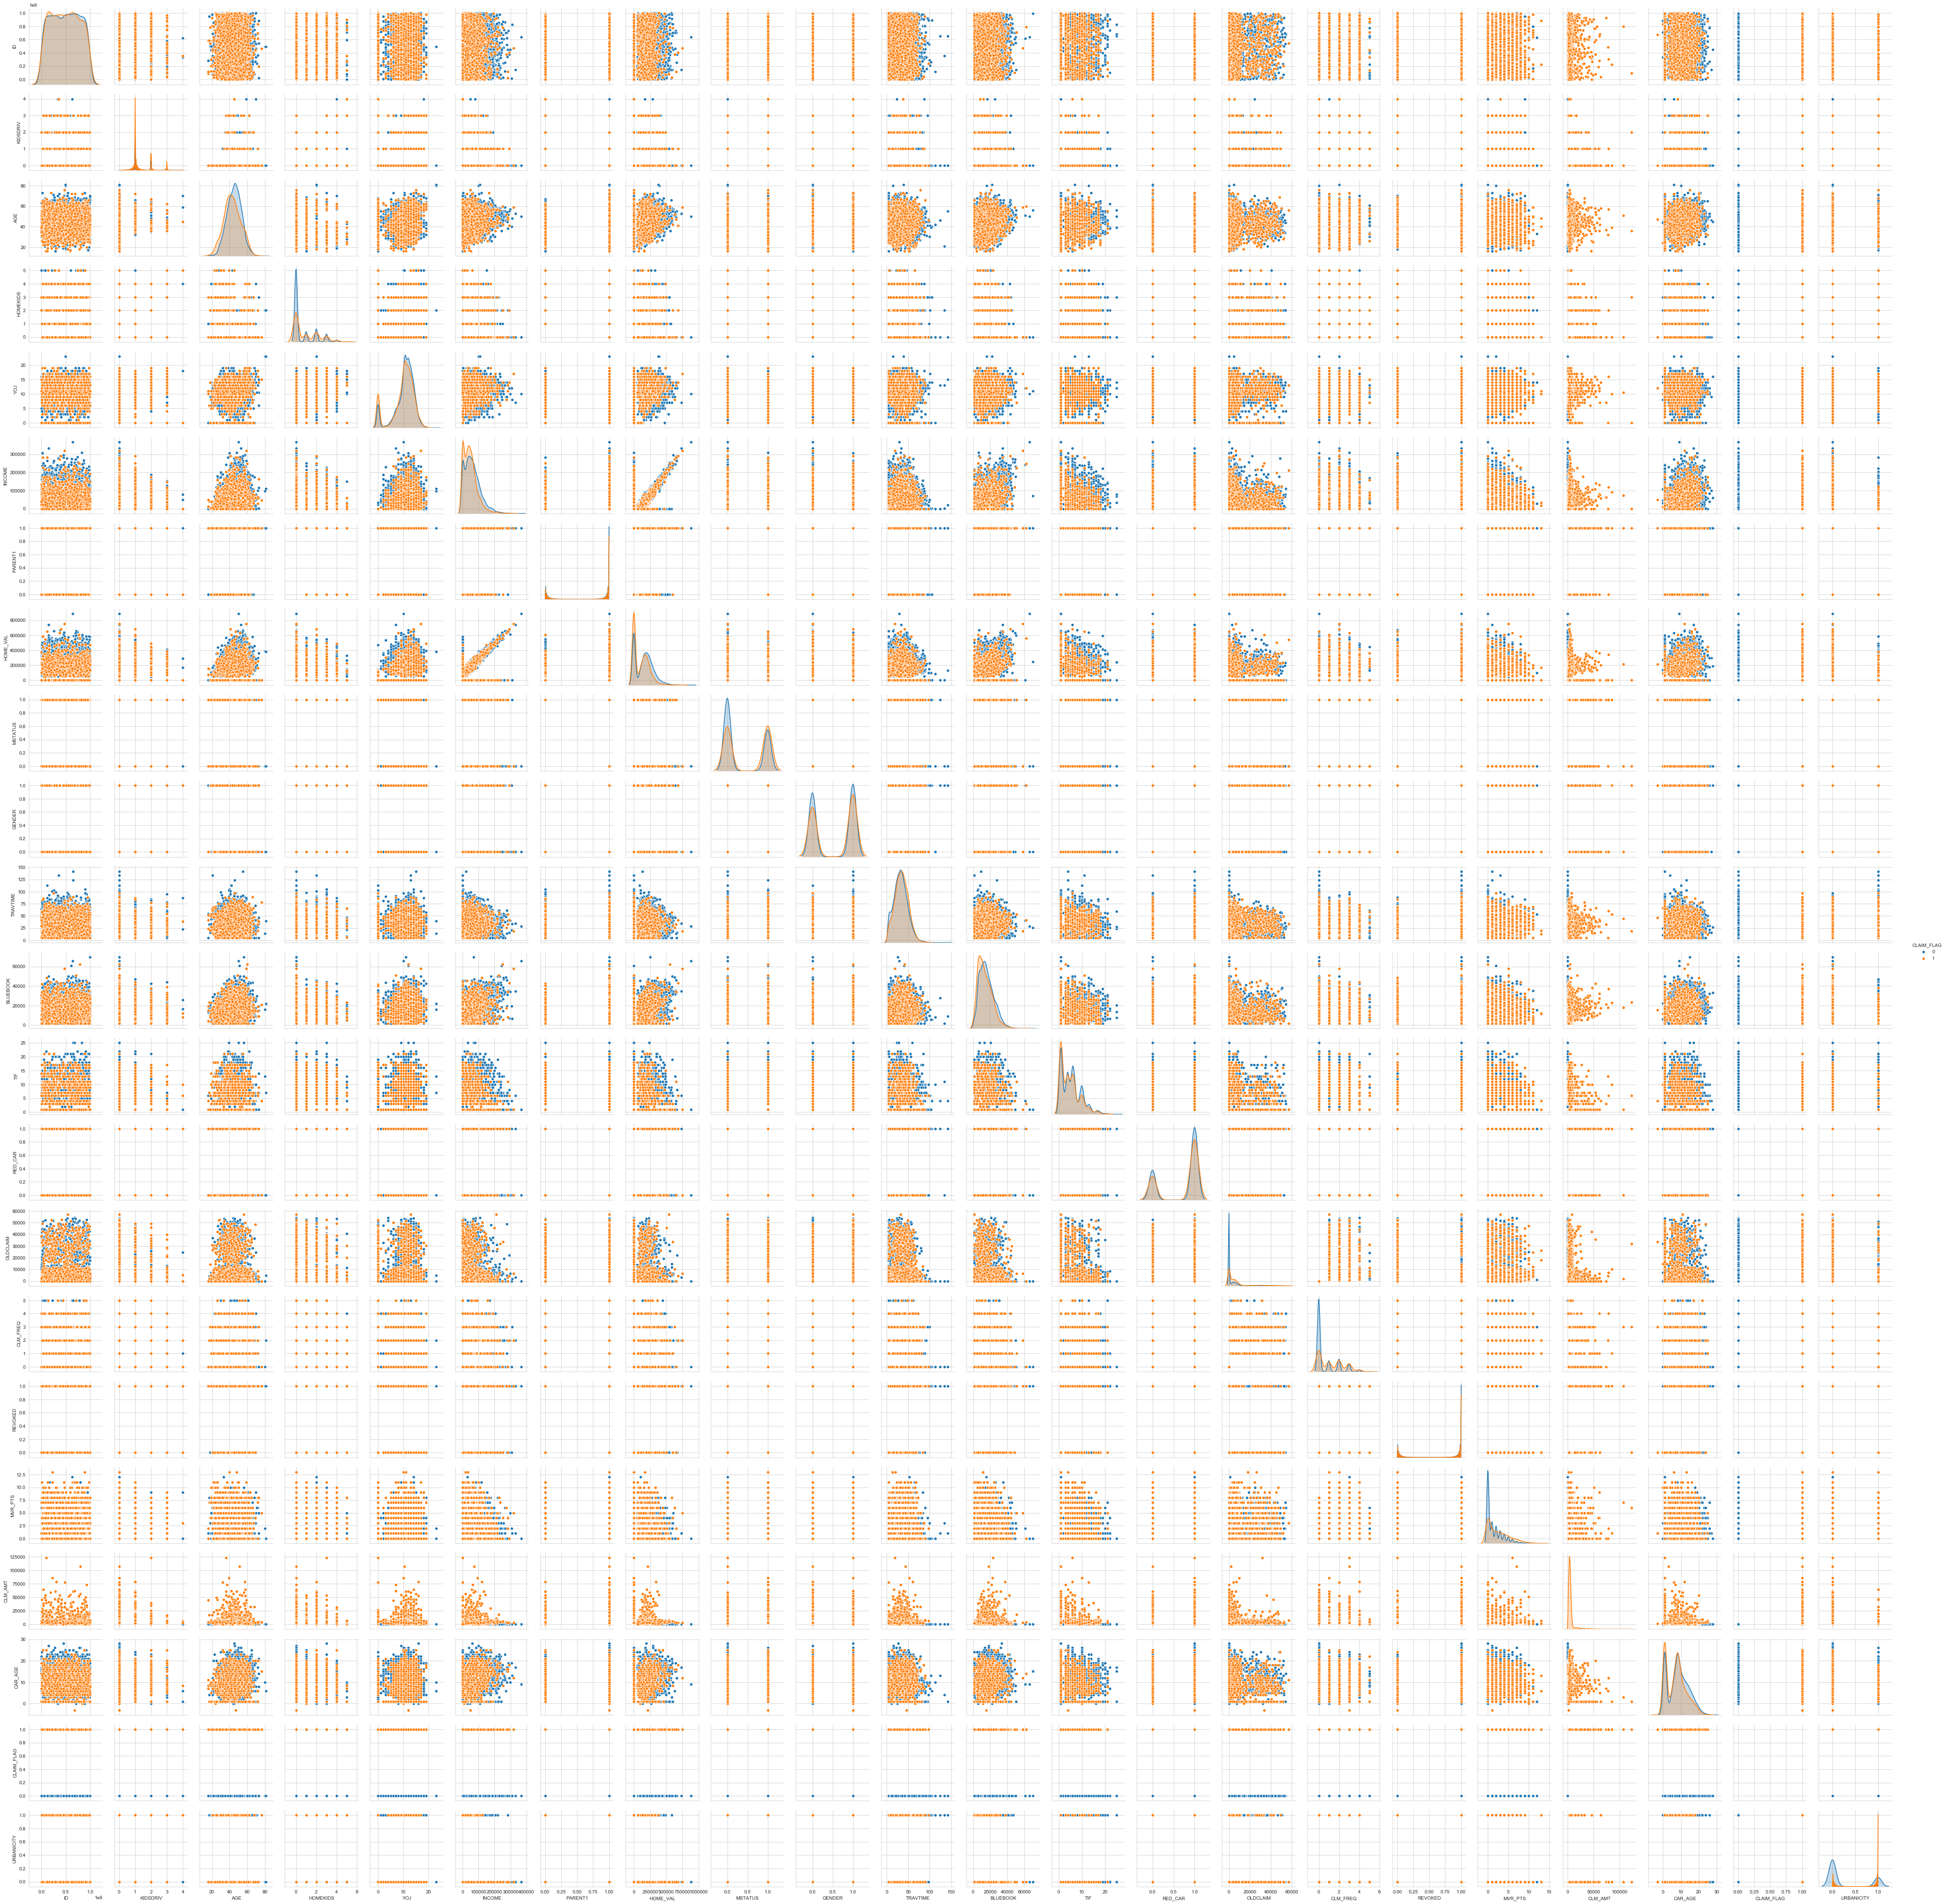

In [14]:
plt.figure(figsize=(10,6))
sns.pairplot(df,hue ='CLAIM_FLAG')

In [158]:
df.corr()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  INCOME  PARENT1  HOME_VAL  \
ID          1.00      0.00 -0.01      0.01 -0.01   -0.02     0.00     -0.01   
KIDSDRIV    0.00      1.00 -0.08      0.46  0.04   -0.04    -0.20     -0.01   
AGE        -0.01     -0.08  1.00     -0.45  0.14    0.17     0.31      0.19   
HOMEKIDS    0.01      0.46 -0.45      1.00  0.08   -0.15    -0.45     -0.10   
YOJ        -0.01      0.04  0.14      0.08  1.00    0.27     0.04      0.25   
INCOME     -0.02     -0.04  0.17     -0.15  0.27    1.00     0.06      0.51   
PARENT1     0.00     -0.20  0.31     -0.45  0.04    0.06     1.00      0.23   
HOME_VAL   -0.01     -0.01  0.19     -0.10  0.25    0.51     0.23      1.00   
MSTATUS     0.00     -0.04 -0.09     -0.05 -0.14    0.04    -0.47     -0.42   
GENDER     -0.01      0.04 -0.07      0.11 -0.08   -0.11    -0.07     -0.07   
TRAVTIME   -0.00      0.01 -0.00     -0.00 -0.02   -0.05     0.02     -0.03   
CAR_USE     0.02     -0.00 -0.03     -0.01  0.03    0.08    -0.00      0.03   
BLUEBOOK   -0.00     -0.03  0.17     -0.11  0.14    0.41     0.05      0.24   
TIF        -0.01     -0.01 -0.00      0.01  0.02    0.00    -0.01      0.01   
RED_CAR    -0.01      0.04 -0.03      0.07 -0.05   -0.06    -0.04     -0.03   
OLDCLAIM    0.00      0.02 -0.03      0.03 -0.00   -0.04    -0.04     -0.06   
CLM_FREQ   -0.00      0.04 -0.04      0.04 -0.02   -0.04    -0.06     -0.09   
REVOKED    -0.00     -0.03  0.05     -0.04  0.01    0.02     0.05      0.04   
MVR_PTS     0.01      0.05 -0.08      0.06 -0.04   -0.05    -0.07     -0.09   
CLM_AMT    -0.01      0.07 -0.05      0.07 -0.03   -0.05    -0.10     -0.09   
CAR_AGE    -0.00     -0.06  0.17     -0.15  0.06    0.38     0.06      0.20   
CLAIM_FLAG -0.01      0.11 -0.11      0.12 -0.06   -0.13    -0.16     -0.17   
URBANICITY  0.02      0.04 -0.04      0.06 -0.08   -0.19    -0.02     -0.11   

            MSTATUS  GENDER     ...       TIF  RED_CAR  OLDCLAIM  CLM_FREQ  \
ID             0.00   -0.01     ...     -0.01    -0.01      0.00     -0.00   
KIDSDRIV      -0.04    0.04     ...     -0.01     0.04      0.02      0.04   
AGE           -0.09   -0.07     ...     -0.00    -0.03     -0.03     -0.04   
HOMEKIDS      -0.05    0.11     ...      0.01     0.07      0.03      0.04   
YOJ           -0.14   -0.08     ...      0.02    -0.05     -0.00     -0.02   
INCOME         0.04   -0.11     ...      0.00    -0.06     -0.04     -0.04   
PARENT1       -0.47   -0.07     ...     -0.01    -0.04     -0.04     -0.06   
HOME_VAL      -0.42   -0.07     ...      0.01    -0.03     -0.06     -0.09   
MSTATUS        1.00   -0.00     ...      0.01    -0.01      0.04      0.07   
GENDER        -0.00    1.00     ...      0.01     0.66      0.00     -0.01   
TRAVTIME      -0.01    0.01     ...     -0.01    -0.00     -0.01      0.01   
CAR_USE        0.01   -0.28     ...      0.00    -0.19      0.03      0.08   
BLUEBOOK       0.01   -0.06     ...      0.00    -0.03     -0.03     -0.04   
TIF            0.01    0.01     ...      1.00     0.01     -0.02     -0.02   
RED_CAR       -0.01    0.66     ...      0.01     1.00     -0.01     -0.02   
OLDCLAIM       0.04    0.00     ...     -0.02    -0.01      1.00      0.49   
CLM_FREQ       0.07   -0.01     ...     -0.02    -0.02      0.49      1.00   
REVOKED       -0.04   -0.01     ...      0.03    -0.01     -0.42     -0.06   
MVR_PTS        0.05    0.01     ...     -0.03    -0.00      0.26      0.40   
CLM_AMT        0.08   -0.00     ...     -0.05    -0.00      0.08      0.12   
CAR_AGE        0.03   -0.02     ...      0.01    -0.02     -0.02     -0.02   
CLAIM_FLAG     0.13    0.02     ...     -0.08     0.01      0.14      0.22   
URBANICITY    -0.01    0.05     ...     -0.01     0.04     -0.15     -0.24   

            REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY  
ID            -0.00     0.01    -0.01    -0.00       -0.01        0.02  
KIDSDRIV      -0.03     0.05     0.07    -0.06        0.11        0.04  
AGE            0.05    -0

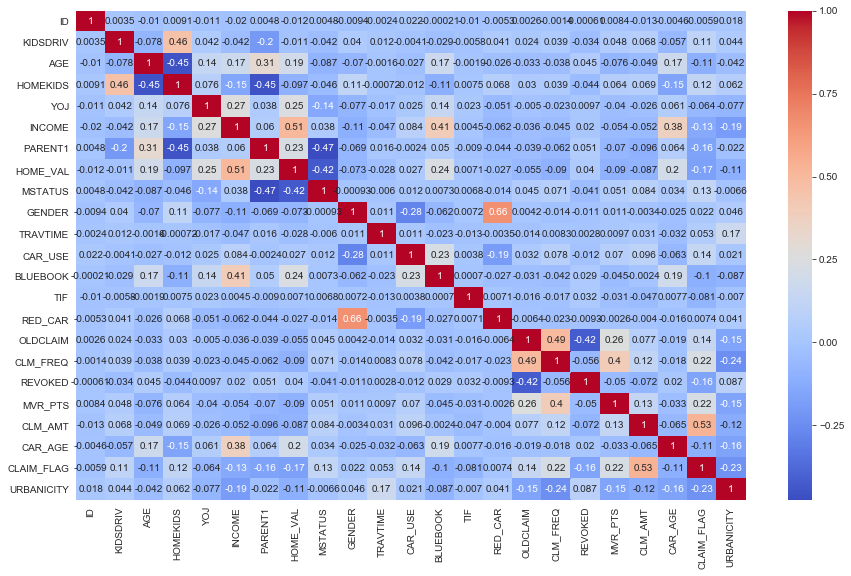

In [159]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot = True,cmap ='coolwarm')

### DEFINING MODEL GENERAL FUNCTIONS

In [160]:
def calculate_cv_error(X_train,y_train):
    regr = LinearRegression()
    ms_errors= cross_val_score(regr, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()/1000
    return mean_rms_error

def build_OLS_model(X_train,y_train):
    X = sm.add_constant(X_train)
    ols_model = sm.OLS(y_train,X_train)
    return ols_model

In [168]:
def evaluate_model(mod_df,cat_feats,i):
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    X = final_data.drop('CAR_AGE',axis = 1)
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    print(f'\n\nModel {i + 1} Evaluation')
    print("Cross Validation Error: "+str(calculate_cv_error(X_train,y_train)))
    model = build_OLS_model(X_train,y_train)
    print(model.fit().summary())
    
def pred_model(mod_df,cat_feats,i): 
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    X = final_data.drop('CAR_AGE',axis = 1)
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    pred = lm.predict(X_test)
    plt.scatter(y_test,pred,alpha=0.4,marker='o')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    print("""*****************************************************
    """)
    print('MAE:', metrics.mean_absolute_error(y_test, pred))
    print('MSE:', metrics.mean_squared_error(y_test, pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print("""*****************************************************
    """)
    sns.distplot((y_test-pred),bins=50)
    plt.show()
    

## Linear Regression

### MULTI LINEAR REGRESSION MODELS



Model 1 Evaluation
Cross Validation Error: 0.004784284402689446
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     568.3
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:04:19   Log-Likelihood:                -20601.
No. Observations:                6902   AIC:                         4.128e+04
Df Residuals:                    6862   BIC:                         4.156e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

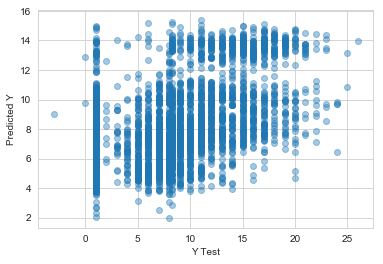

*****************************************************
    
MAE: 3.881379553711576
MSE: 23.014277566130417
RMSE: 4.797319831544528
*****************************************************
    


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


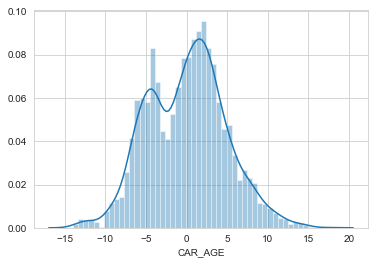



Model 2 Evaluation
Cross Validation Error: 0.004773168439425672
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1192.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:04:20   Log-Likelihood:                -20619.
No. Observations:                6902   AIC:                         4.128e+04
Df Residuals:                    6883   BIC:                         4.141e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

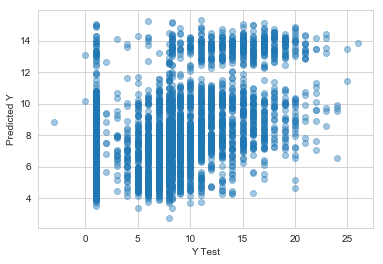

*****************************************************
    
MAE: 3.8876661409417093
MSE: 23.059863363426935
RMSE: 4.80206865459324
*****************************************************
    


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


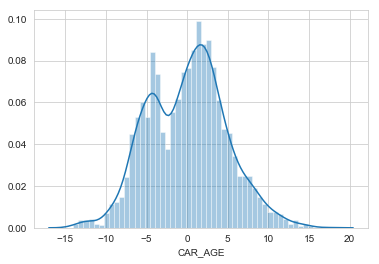



Model 3 Evaluation
Cross Validation Error: 0.004783669572802622
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1312.
Date:                Mon, 18 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:04:21   Log-Likelihood:                -20820.
No. Observations:                6902   AIC:                         4.167e+04
Df Residuals:                    6886   BIC:                         4.178e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

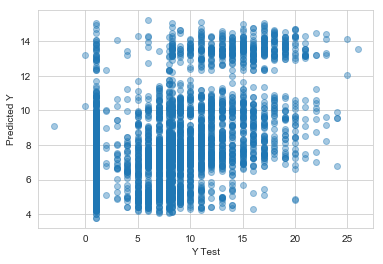

*****************************************************
    
MAE: 3.893878474812588
MSE: 23.183902948329102
RMSE: 4.814966557342751
*****************************************************
    


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


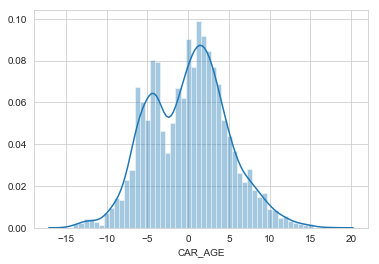

In [169]:
for i in range (3):
    if i == 0:
        mod_df = df.drop(['ID','TRAVTIME','PARENT1','TIF','BIRTH','EDUCATION','YOJ','GENDER','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','BLUEBOOK', 'INCOME'],axis = 1)
        cat_feats =['KIDSDRIV','HOMEKIDS','MVR_PTS','OCCUPATION','CAR_TYPE']
        evaluate_model(mod_df,cat_feats,i)
        pred_model(mod_df,cat_feats,i)
    elif i == 1:
        mod_df = df.drop(['ID','TRAVTIME','PARENT1','TIF','BIRTH','EDUCATION','YOJ','GENDER','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','KIDSDRIV','HOMEKIDS','MVR_PTS','BLUEBOOK', 'INCOME'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE']
        evaluate_model(mod_df,cat_feats,i)
        pred_model(mod_df,cat_feats,i)
    else:
        mod_df = df.drop(['ID','TRAVTIME','PARENT1','TIF','BIRTH','EDUCATION','YOJ','GENDER','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','KIDSDRIV','HOMEKIDS','MVR_PTS','BLUEBOOK','CLM_AMT','AGE', 'INCOME','CLAIM_FLAG'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE']
        evaluate_model(mod_df,cat_feats,i)
        pred_model(mod_df,cat_feats,i)
    

In [134]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [164]:
mod_df = df.drop(['ID','TRAVTIME','PARENT1','TIF','BIRTH','EDUCATION','YOJ','GENDER','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','KIDSDRIV','HOMEKIDS','MVR_PTS','CLM_AMT','BLUEBOOK','AGE', 'INCOME'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE']
final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
calculate_vif_(final_data)

Remaining variables:
Index(['HOME_VAL', 'MSTATUS', 'CAR_USE', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY',
       'OCCUPATION_Doctor', 'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer',
       'OCCUPATION_Manager', 'OCCUPATION_Professional', 'OCCUPATION_Student',
       'OCCUPATION_z_Blue Collar', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV'],
      dtype='object')


HOME_VAL  MSTATUS  CAR_USE  CAR_AGE  CLAIM_FLAG  URBANICITY  \
0          0.00        1        0    18.00           0           0   
1     257252.00        1        1     1.00           0           0   
2          0.00        1        0    10.00           0           0   
3     124191.00        0        0    10.00           0           0   
4     306251.00        0        0     6.00           0           0   
5     243925.00        0        0    17.00           0           0   
6          0.00        1        1     7.00           1           0   
7          0.00        0        0     1.00           0           0   
8          0.00        1        0     1.00           1           0   
9          0.00        1        1    10.00           0           1   
10    333680.00        0        1     7.00           1           0   
11         0.00        1        0     1.00           1           0   
12         0.00        1        1    17.00           0           1   
13         0.00        1        0    11.00           1           0   
14    209970.00        0        0     1.00           0           1   
15    180232.00        0        1     9.00           0           0   
16         0.00        1        1    10.00           1           0   
17         0.00        1        0     4.00           0           1   
18    106859.00        0        0     5.00           1           0   
19    180951.00        1        0    13.00           0           1   
20         0.00        1        0     1.00           1           0   
21    192207.00        0        0    16.00           0           0   
22     91875.00        0        0    20.00           0           0   
23     93797.00        0        0     7.00           0           0   
24    170598.00        0        1     1.00           1           0   
25         0.00        0        1     1.00           1           0   
26    282904.00        0        0    14.00           0           0   
27         0.00        1        0     5.00           0           0   
28     82344.00        0        0    11.00           0           0   
29    207519.00        0        1    12.00           0           0   
...         ...      ...      ...      ...         ...         ...   
10272 236725.00        0        1     7.00           0           0   
10273 209239.00        0        1     5.00           0           1   
10274      0.00        1        1    12.00           0           0   
10275 331156.00        1        1    12.00           0           0   
10276 334777.00        0        0    20.00           0           0   
10277      0.00        1        0    12.00           0           0   
10278      0.00        0        1     8.00           0           1   
10279 227054.00        1        0     1.00           0           1   
10280 134977.00        0        0     1.00           0           1   
10281 266403.00        0        0    16.00           0           0   
10282 352524.00        1        0     4.00           0           1   
10283 232182.00        1        0     9.00           0           0   
10284 393624.00        0        0    22.00           0           1   
10285 289370.00        0        0    10.00           1           0   
10286 153061.00        1        0     1.00           0           0   
10287      0.00        1        1     1.00           1           0   
10288 291969.00        0        1     1.00           0           0   
10289 244889.00        0        0     1.00           0           0   
10290 272725.00        0        1     4.00           0           0   
10291      0.00        1        0     1.00           0           1   
10292      0.00        1        0    18.00           0           0   
10293      0.00        1        1    15.00           1           0   
10294      0.00        0        1    15.00           0           0   
10295      0.00        1        0     7.00           0           1   
10296      0.00        1        1     8.00           0           1   
10297 386273.00  

## Logistic Regression